### Filename: ten_arm_bandit_19092019.ipynb
### Topic: 10-arm bandit problem
### Algorithms: greedy, ep-greedy, UCB
### Details: comparative study of above mentioned algorithms on 10-armed bandit problem

#### Date: September 19, 2019

#### Author: Nikhil Singh
#### Language: python 3

In [2]:
# Initializing Libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
# Initializing relevant variables
k=10                                      # number of arms
t=1000                                    # time steps in a single run
runs=2000                                 # independent runs, each with a different bandit problem

In [4]:
# Initializing algorithm pre-assumtions
q_true = np.random.normal(0,1,(runs,k))
a_max = np.argmax(q_true, 1)

## Function for $\epsilon$ - greedy algorithm

In [26]:
def eps_greedy_algo(epsilon_val):
    Q = np.zeros((runs,k))                  # reward matrix     - runs X arms
    N = np.ones((runs,k))                   # arm-pull matrix   - runs X arms
    
    # for every single time-stamp in every single run, a reward will be received and also arm-pull matrix needs to be updated.
    
    Qi = np.random.normal(q_true,1)         # initial pulling of arm - first level probability assumption
    
    # reward collected as per the epsilon value provided
    R_epsilon = []                          # list to collect average reward
    R_epsilon.append(0)
    R_epsilon.append(np.mean(Qi))
    
    # optimal action reward list, it will get appended from 2 as the starting two were manually selected option
    R_epsilon_optimal=[]                    # list to collect the optimal action
    
    for a in range(2,t+1):                  # reason for starting it from second run is as the first two were selected directly
        pull_reward=[]
        optimal_arm=0
        
        for i in range(runs):
            if np.random.random_sample()<epsilon_val:      # exploration or exploitation
                j=np.random.randint(k)      # select which arm
            else:
                j=np.argmax(Q[i])           # here it doesn't matter about epsilon as all we care about is exploitation.
            
            if j==a_max[i]:                 # checking whether what we got in previous action is actually an optimal one or not.
                optimal_arm=optimal_arm+1   # base counter about how many times optimal arm has been pulled
                
            temp_reward = np.random.normal(q_true[i][j],1)   # selecting the reward finally
            pull_reward.append(temp_reward)                  # appending the reward in a list for the entire run
            
            # updating Q(a)
            N[i][j]=N[i][j]+1
            Q[i][j]=Q[i][j]+(temp_reward-Q[i][j])/N[i][j]
            
        
        mean_rew_pull = np.mean(pull_reward)
        R_epsilon.append(mean_rew_pull)     # adding reward in the reward collection list after the first 2 base runs
        R_epsilon_optimal.append((optimal_arm*100)/2000) # calculating the percentage benefit because of this arm pull.
        
    return R_epsilon, R_epsilon_optimal

## Function for Upper Confidence Bound action selection

In [30]:
def ucb_action_selection(confidence_val):
    Q = np.zeros((runs,k))                # reward matrix     - runs X arms
    N = np.ones((runs,k))                 # arm-pull matrix   - runs X arms
    
    # for every single time-stamp in every single run, a reward will be received and also arm-pull matrix needs to be updated.
    
    Qi = np.random.normal(q_true,1)       # initial pulling of arm - first level probability assumption
    
    # reward collected as per the confidence value and based on the flow of algo dependent on `a`
    R_ucb = []                            # list to collect average reward
    R_ucb.append(0)
    R_ucb.append(np.mean(Qi))
    
    # optimal action reward list, it will get appended from 2 as the starting two were manually selected option
    R_ucb_optimal_action=[]               # list to collect the optimal action
    
    for a in range(2,t+1):                # reason for starting it from second run is as the first two were selected directly
        pull_reward=[]
        optimal_arm=0
        
        for i in range(runs):
            # each time a is selected, uncertainty decreases
            # each time action other than a happens, uncertainty estimate increases and it gets smaller over time because of \
            # natural log
            Qt_a = Q[i]+(confidence_val*np.sqrt(np.log(a)/N[i]))
            j=np.argmax(Qt_a)
            if j==a_max[i]:                        # checking whether what we got in previous action is actually an optimal one or not.
                optimal_arm=optimal_arm+1          # base counter about how many times optimal arm has been pulled
                
            temp_reward = np.random.normal(q_true[i][j],1)   # selecting the reward finally
            pull_reward.append(temp_reward)                  # appending the reward in a list for the entire run
            
            # updating Q(a)
            N[i][j]=N[i][j]+1
            Q[i][j]=Q[i][j]+(temp_reward-Q[i][j])/N[i][j]
            
        
        mean_rew_pull = np.mean(pull_reward)
        R_ucb.append(mean_rew_pull)                         # adding reward in the reward collection list after the first 2 base runs
        R_ucb_optimal_action.append((optimal_arm*100)/2000) # calculating the percentage benefit because of this arm pull.
        
    return R_ucb, R_ucb_optimal_action

#### For $\epsilon$ = 0
- pure greedy stage

In [37]:
# Running it for epsilon=0 i.e. greedy algorithm compelete exploitation manner
r_0, r_0_optimal_act = eps_greedy_algo(0)

#### For $\epsilon$ = 0.01

In [38]:
# Running it for epsilon=0.01 i.e. epsilon-greedy algorithm
r_001, r_001_optimal_act = eps_greedy_algo(0.01)

#### For $\epsilon$ = 0.1

In [39]:
# Running it for epsilon=0.1 i.e. epsilon-greedy algorithm
r_01, r_01_optimal_act = eps_greedy_algo(0.1)

#### For $\epsilon$ = 1            
- pure exploration stage

In [40]:
# Running it for epsilon=1 i.e. epsilon-greedy algorithm but in a completely explorative manner.
r_1, r_1_optimal_act = eps_greedy_algo(1)

#### degree of exploration (c) = 1
- allowing uncertainity by a factor of c=1

In [33]:
# UCB - allowing uncertainity by a factor of c=1
r_c1, r_c1_optimal_act = ucb_action_selection(1)

#### degree of exploration (c) = 2
- allowing uncertainity by a factor of c=2

In [34]:
# UCB - allowing uncertainity by a factor of c=2
r_c2, r_c2_optimal_act = ucb_action_selection(2)

### Average Performance of $\epsilon$ - greedy vs UCB on the 10-armed testbed

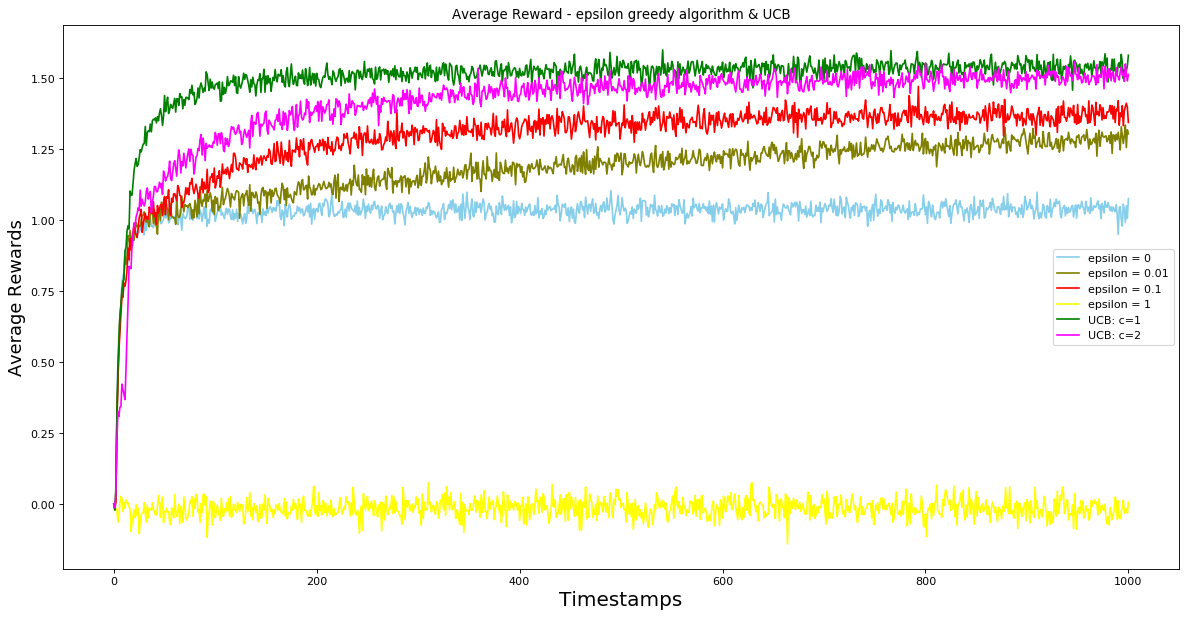

In [36]:
plt.figure(figsize=(18,9), dpi=80, facecolor='w', edgecolor='k')

# adding sub-plots for epsilon-greedy algorithm
plt.plot(range(0,t+1), r_0, color='skyblue', label='epsilon = 0')
plt.plot(range(0,t+1), r_001, color='olive', label='epsilon = 0.01')
plt.plot(range(0,t+1), r_01, color='red', label='epsilon = 0.1')
plt.plot(range(0,t+1), r_1, color='yellow', label='epsilon = 1')


# adding sub-plots for UCB algorithm also
plt.plot(range(0,t+1), r_c1, color='green', label = 'UCB: c=1')
plt.plot(range(0,t+1), r_c2, color='magenta', label = 'UCB: c=2')

# adding basic graph features for understanding
plt.xlabel('Time-stamps', fontsize=18)
plt.ylabel('Average Rewards', fontsize=16)
plt.title('Average Reward - epsilon greedy algorithm & UCB')
plt.legend()

plt.show()

### Optimal Action of $\epsilon$ -greedy vs UCB on the 10-armed testbed

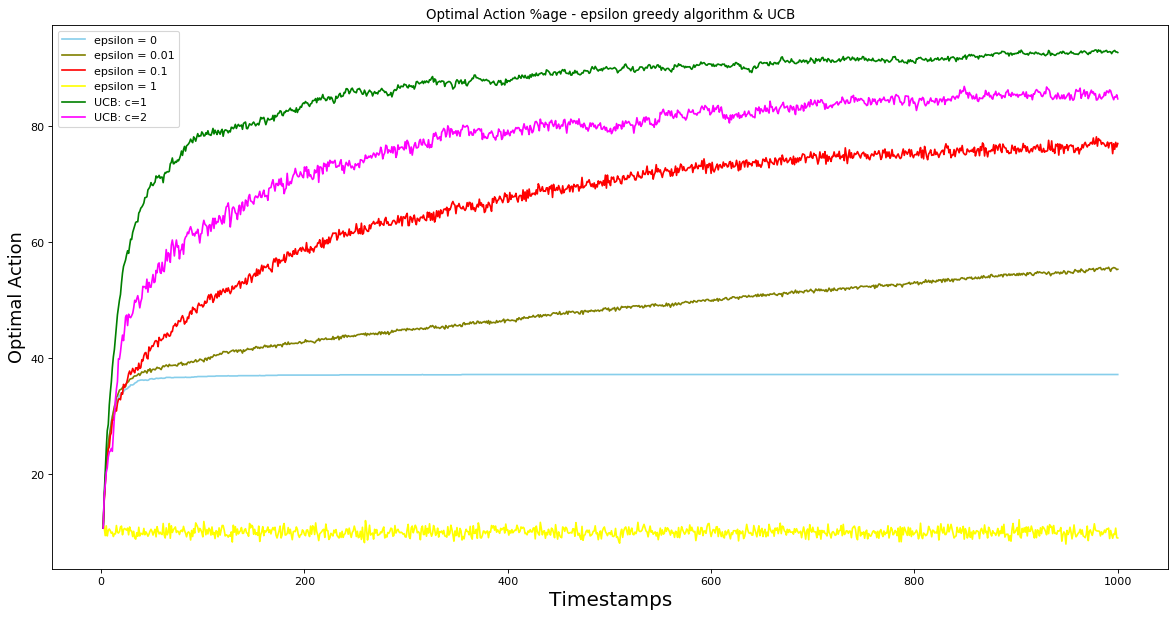

In [43]:
plt.figure(figsize=(18,9), dpi=80, facecolor='w', edgecolor='k')

# adding sub-plots for epsilon-greedy algorithm
plt.plot(range(2,t+1), r_0_optimal_act, color='skyblue', label='epsilon = 0')
plt.plot(range(2,t+1), r_001_optimal_act, color='olive', label='epsilon = 0.01')
plt.plot(range(2,t+1), r_01_optimal_act, color='red', label='epsilon = 0.1')
plt.plot(range(2,t+1), r_1_optimal_act, color='yellow', label='epsilon = 1')


# adding sub-plots for UCB algorithm also
plt.plot(range(2,t+1), r_c1_optimal_act, color='green', label = 'UCB: c=1')
plt.plot(range(2,t+1), r_c2_optimal_act, color='magenta', label = 'UCB: c=2')

# adding basic graph features for understanding
plt.xlabel('Time-stamps', fontsize=18)
plt.ylabel('%age Optimal Action', fontsize=16)
plt.title('Optimal Action %age - epsilon greedy algorithm & UCB')
plt.legend()

plt.show()

### Script Complete